In [49]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy
from scipy.stats import ttest_ind

In [2]:
df=pd.read_csv('yulu_dataset.csv')

# Basic Analysis of Dataset

In [3]:
df.shape

(10886, 12)

In [4]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**No null value present in any column**

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
np.any(df.isna())

False

In [9]:
np.any(df.duplicated())

False

**No duplicate raws present in dataset**

In [10]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

**Changing the type of datetime column**

In [12]:
df['datetime'] = pd.to_datetime(df['datetime'])

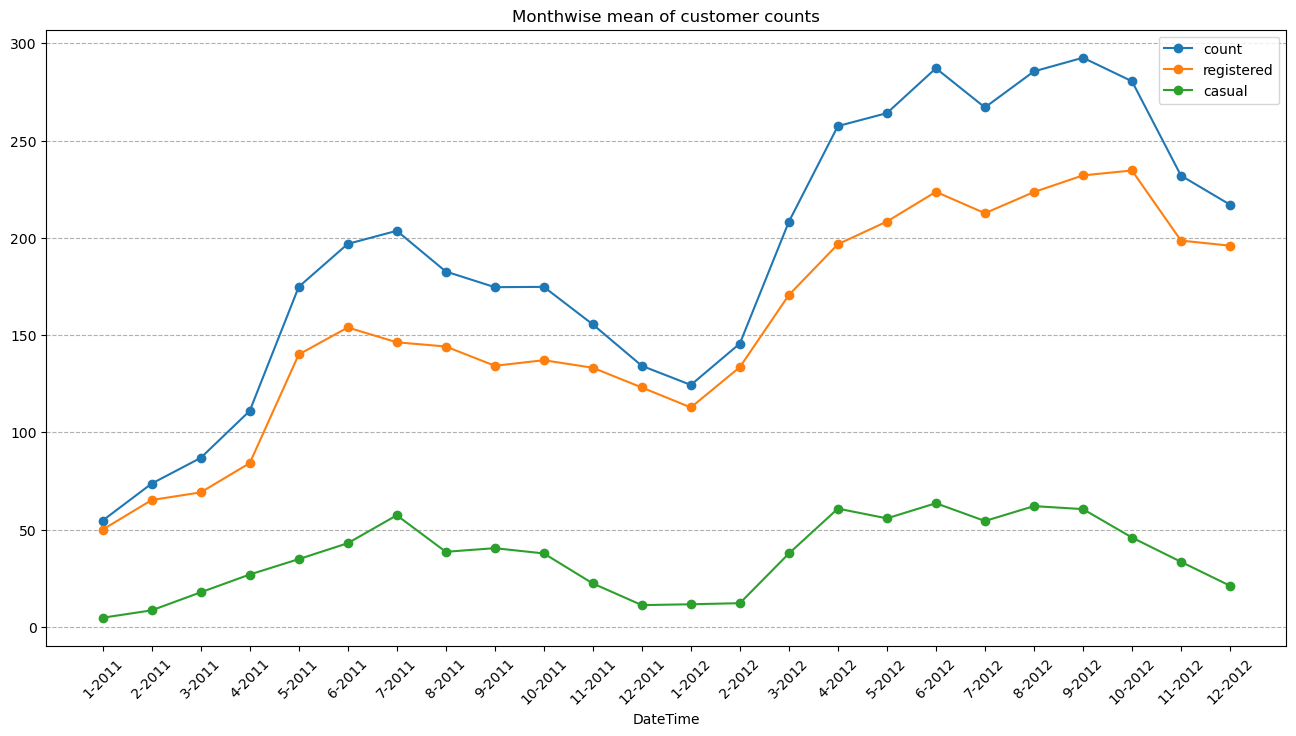

In [19]:
df['month']=df['datetime'].dt.month

df['year']=df['datetime'].dt.year

result=df.groupby(['month','year'])[['casual','registered','count']].mean()
result

result=result.reset_index()

result=result.sort_values(['year','month'])

result['month-year']=result['month'].astype(str)+'-'+result['year'].astype(str)

plt.figure(figsize = (16, 8))
plt.plot(result['month-year'],result['count'],marker='o')
plt.plot(result['month-year'],result['registered'],marker='o')
plt.plot(result['month-year'],result['casual'],marker='o')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(['count','registered','casual'])
plt.xticks(rotation=45)
plt.xlabel('DateTime')
plt.title("Monthwise mean of customer counts")
plt.show()

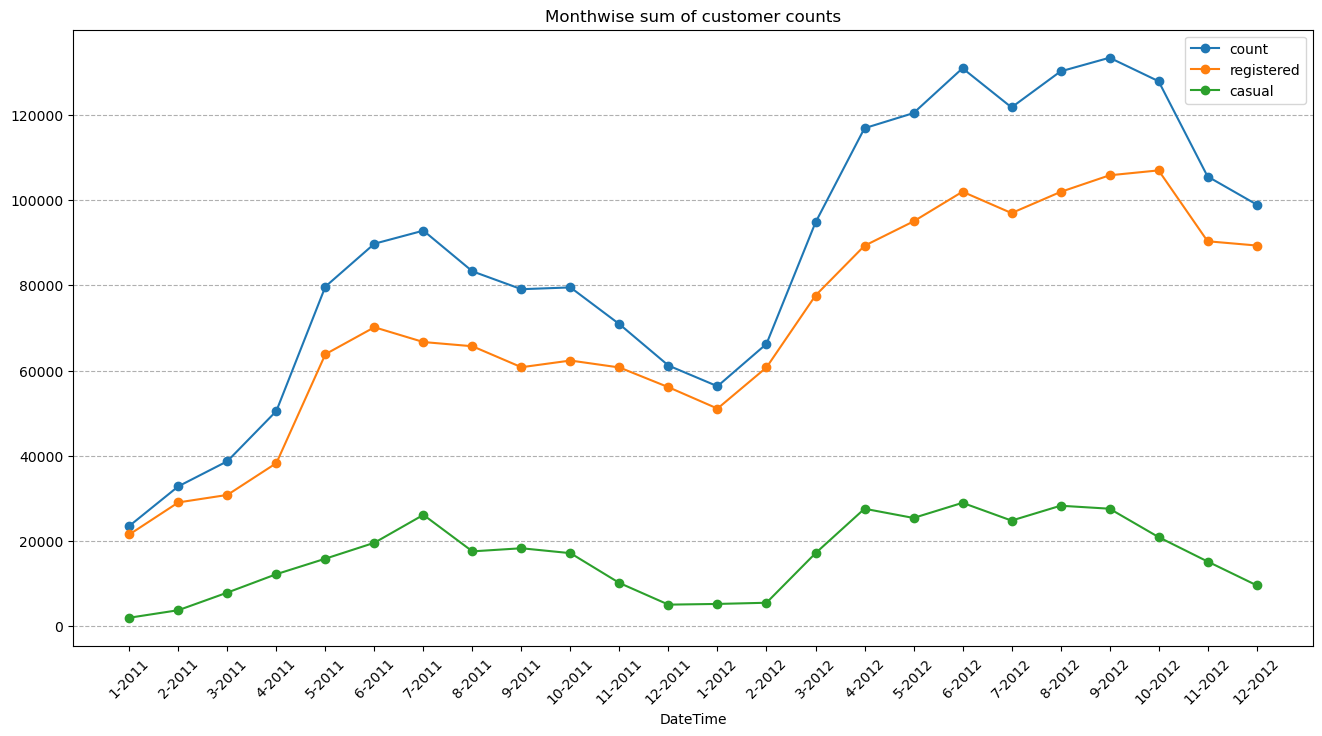

In [20]:
result=df.groupby(['month','year'])[['casual','registered','count']].sum()
result=result.reset_index()
result=result.sort_values(['year','month'])
result['month-year']=result['month'].astype(str)+'-'+result['year'].astype(str)

plt.figure(figsize = (16, 8))
plt.plot(result['month-year'],result['count'],marker='o')
plt.plot(result['month-year'],result['registered'],marker='o')
plt.plot(result['month-year'],result['casual'],marker='o')
plt.grid(axis = 'y', linestyle = '--')
plt.legend(['count','registered','casual'])
plt.xticks(rotation=45)
plt.xlabel('DateTime')
plt.title("Monthwise sum of customer counts")
plt.show()

In [23]:
df.drop(['month','year'],axis=1,inplace=True)

[]

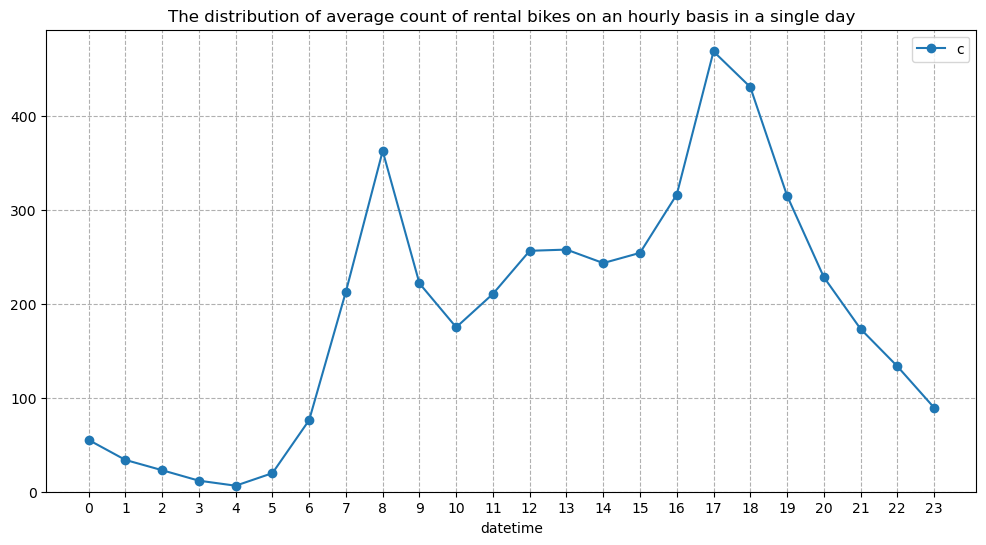

In [25]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(by = df['datetime'].dt.hour)['count'].mean().plot(kind = 'line', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.legend('count')
plt.grid(axis = 'both', linestyle = '--')
plt.plot()

- The highest number of bikes are rented at 8 AM and 5PM
- Moorning (7-9) and evening(16-19) are pick hous for bike rent

# Univariate Analysis

[]

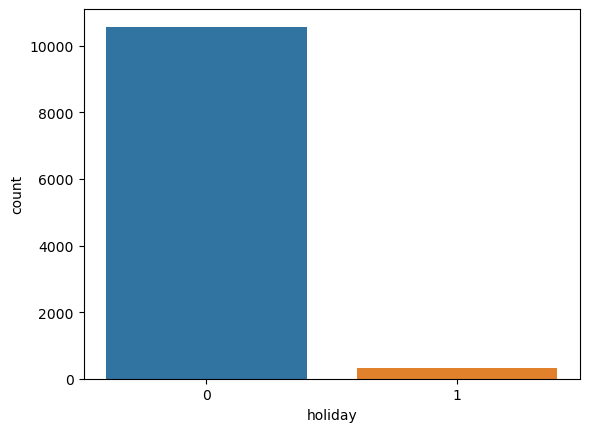

In [28]:
#distribution of holidays in dataset
sns.countplot(data = df, x = 'holiday')
plt.plot()

[]

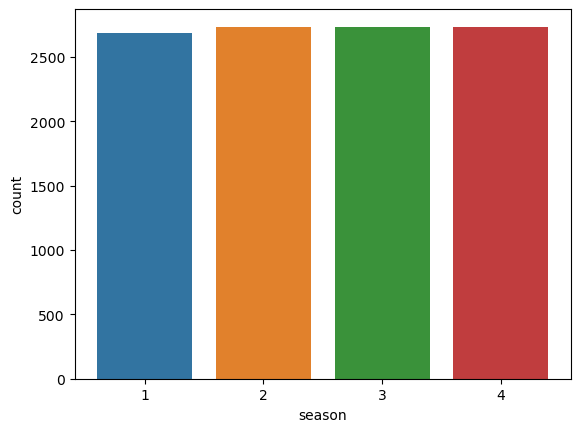

In [29]:
#distribution of seasons in dataset
sns.countplot(data = df, x = 'season')
plt.plot()

[]

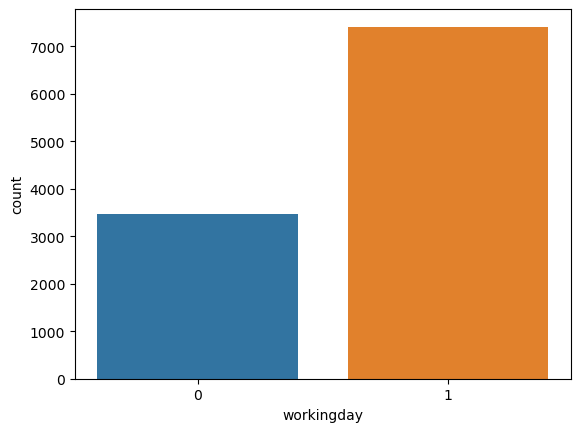

In [31]:
#distribution of working days in dataset
sns.countplot(data = df, x = 'workingday')
plt.plot()

[]

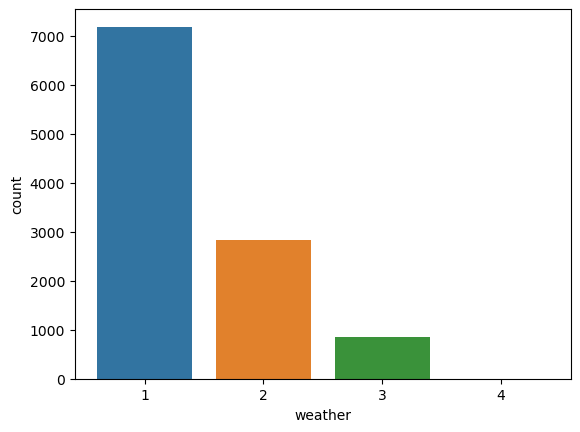

In [32]:
sns.countplot(data = df, x = 'weather')
plt.plot()

[]

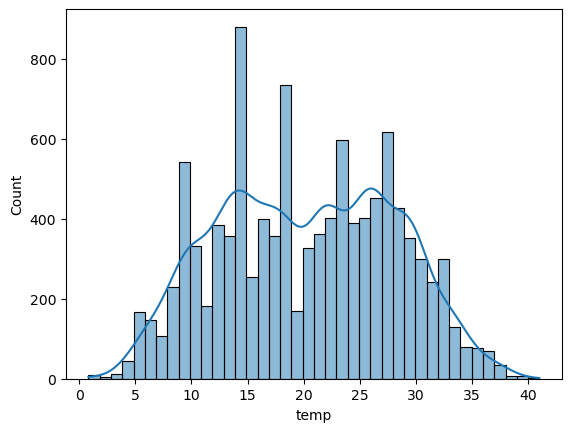

In [33]:
#distribution of temperature in dataset
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.plot()

In [34]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std 

(20.23, 7.79)

[]

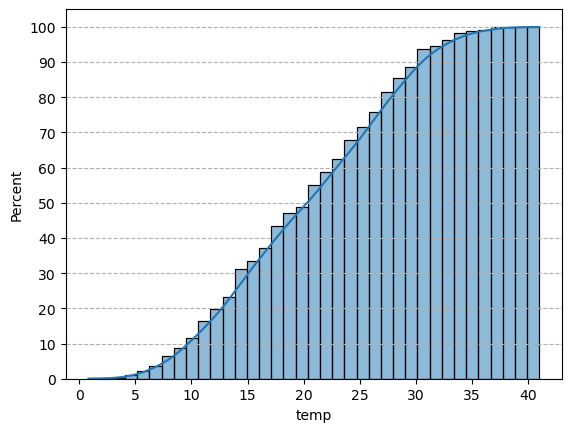

In [35]:
sns.histplot(data = df, x = 'temp', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')
plt.yticks(np.arange(0, 101, 10))
plt.plot()  

 - More than 80 % of the time, the temperature is less than 28 degrees celcius.

(23.66, 8.47)

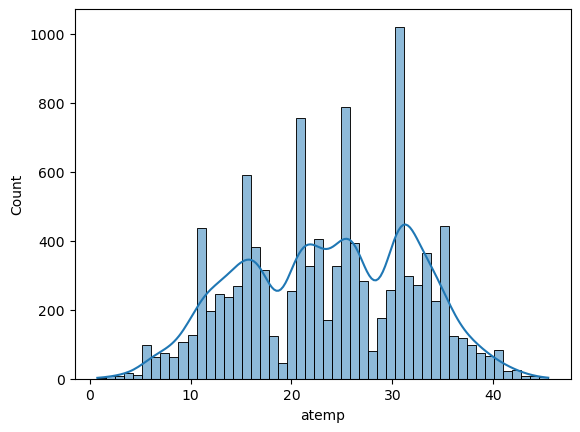

In [36]:
#distribution of atemp col in dataset
sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.plot()         # displaying the chart

temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std 


 - The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

(61.89, 19.25)

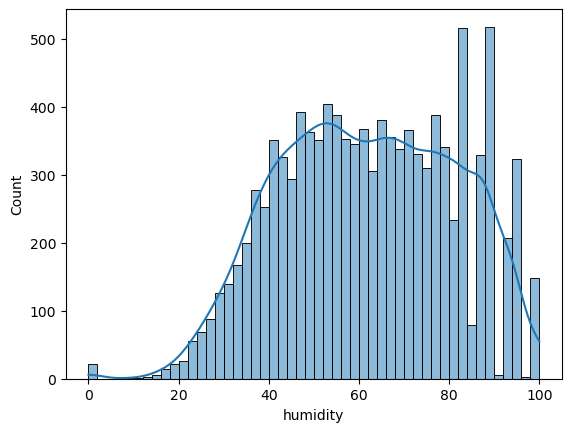

In [39]:
#distribution of humidity in dataset
sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.plot()       # displaying the chart

humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std 


[]

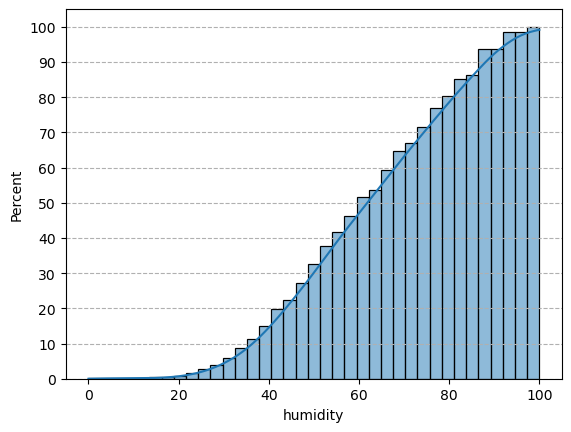

In [40]:
sns.histplot(data = df, x = 'humidity', kde = True, cumulative = True, stat = 'percent')
plt.grid(axis = 'y', linestyle = '--')    
plt.yticks(np.arange(0, 101, 10))
plt.plot()       # displaying the chart


- The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.
- More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist. 

# Outlier detection

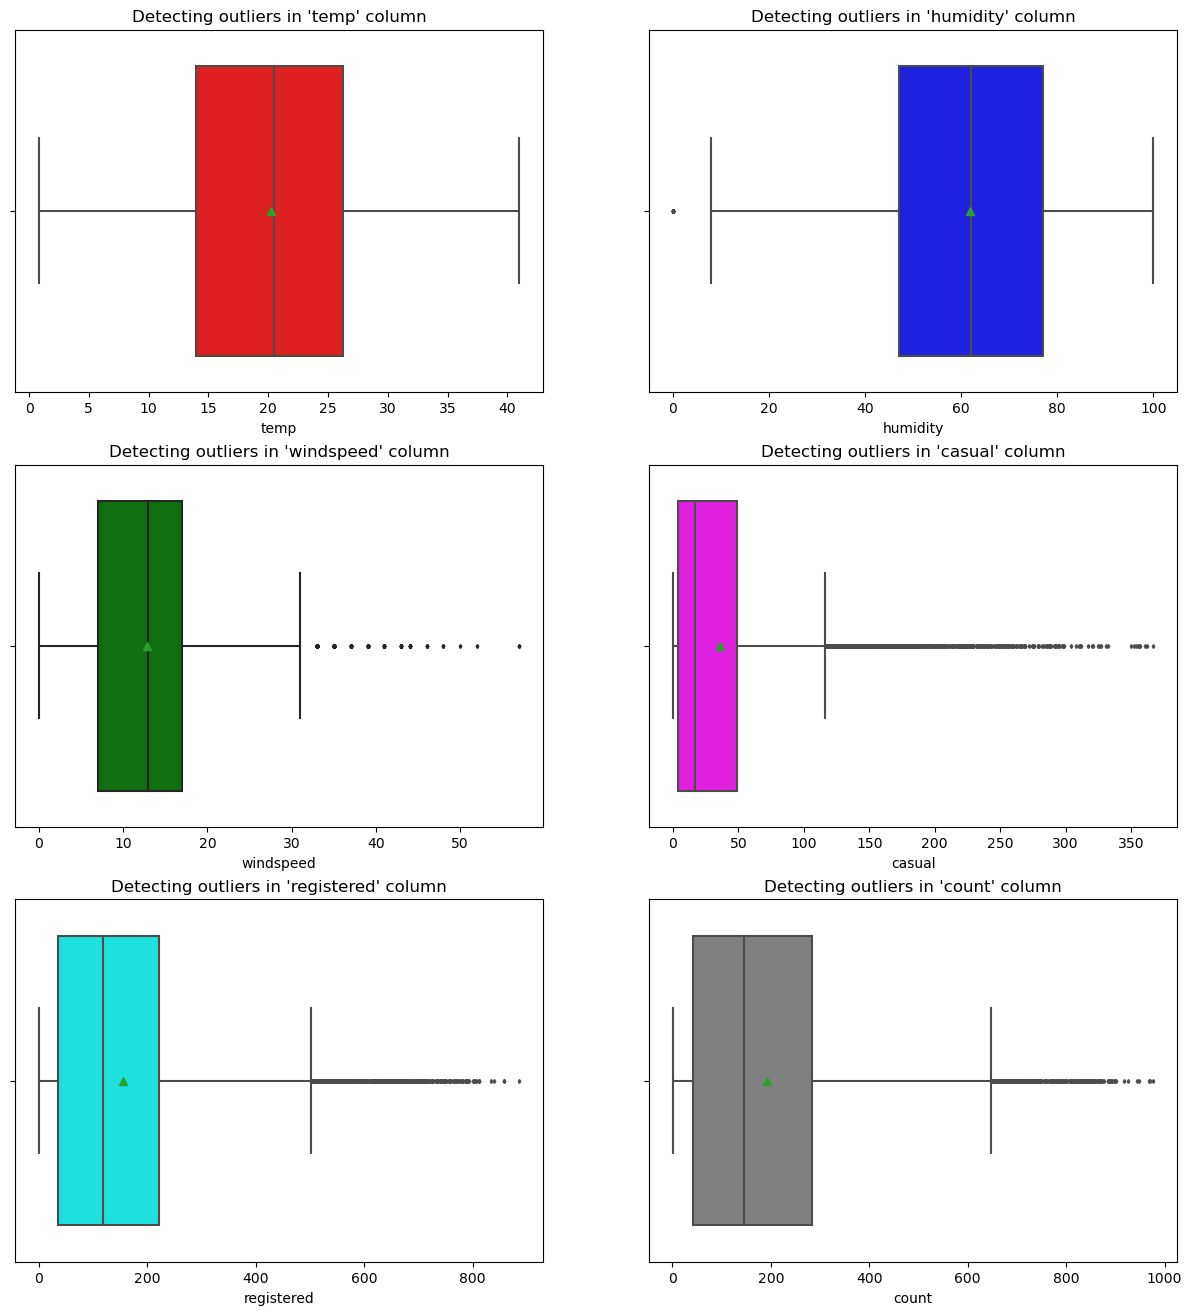

In [41]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
colors = ['red', 'blue', 'green', 'magenta', 'cyan', 'gray']
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], color = colors[count-1], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

 - temp column contains no outliers.
 - humidity column contains few outliers.
 - windspeed, casual, registered, count column contains many outlieras

# Bivariate analysis

[]

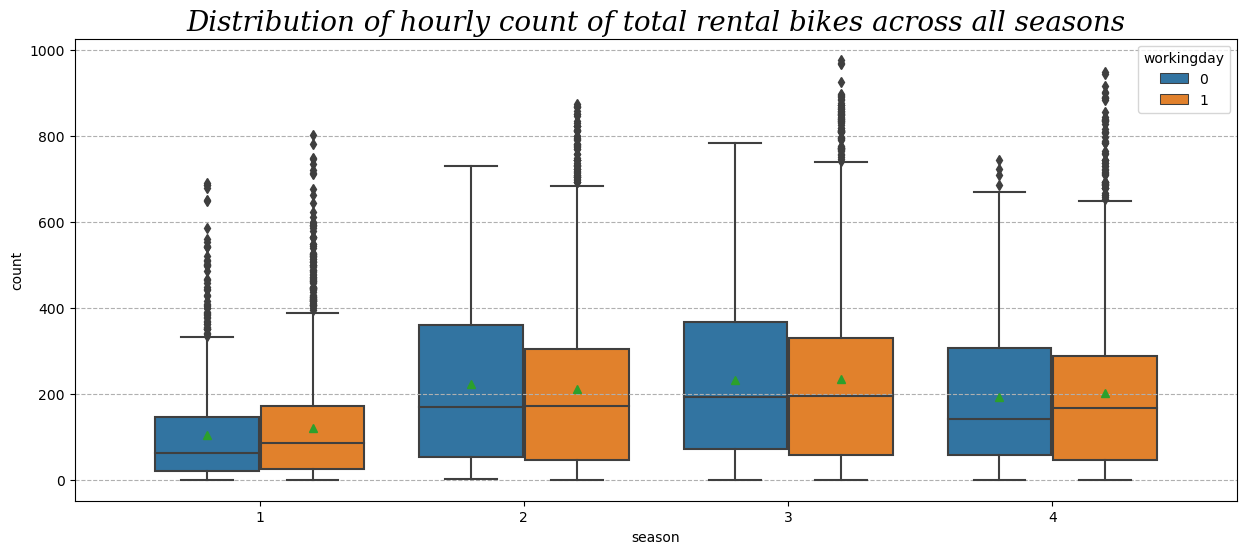

In [42]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

- The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

[]

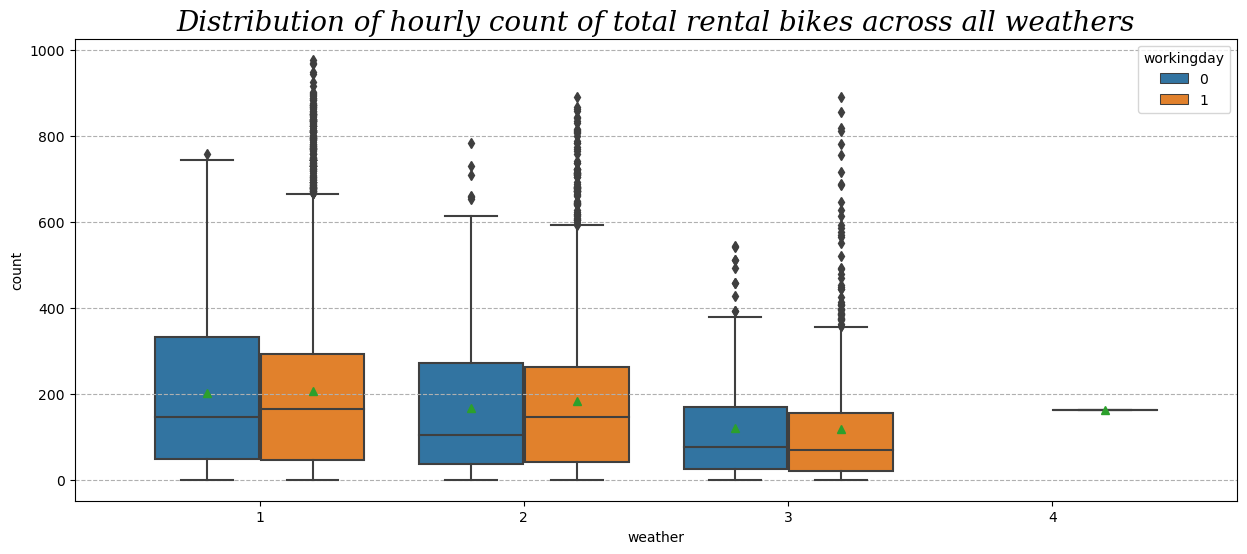

In [43]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers',
         fontdict = {'size' : 20,
                    'style' : 'oblique',
                    'family' : 'serif'})
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.grid(axis = 'y', linestyle = '--')
plt.plot()

- The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions. 

### Is there any effect of Working Day on the number of electric cycles rented ?

In [45]:
df.groupby(by = 'workingday')['count'].describe()


,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


[]

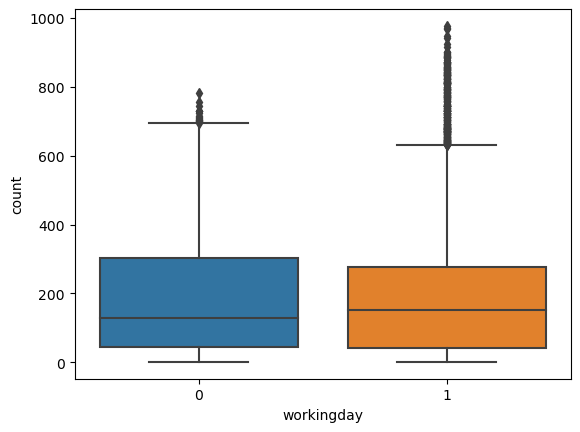

In [46]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.plot()

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Working day have no effect on the number of electric vehicles rented

  * **Alternate Hypothesis ( HA )** - Working day has some effect on the number of electric vehicles rented

***STEP-2***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-3***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

In [53]:
wd_0=df[df['workingday']==0]['count']
wd_1=df[df['workingday']==1]['count']
ttest_ind(wd_0,wd_1)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

***Here P-value> alpha so we fail to reject the null hypothesis***

***So We can conclude that  Working day have no effect on the number of electric vehicles rented***

### Is there any effect of holidays on the number of electric cycles rented ?

In [54]:
df.groupby(by = 'holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


[]

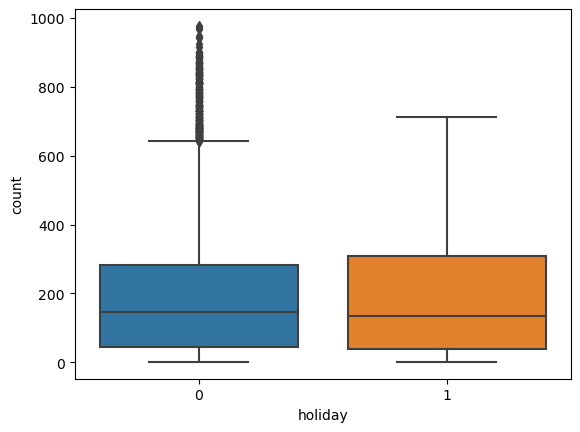

In [55]:
sns.boxplot(data = df, x = 'holiday', y = 'count')
plt.plot()

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Holidays have no effect on the number of electric vehicles rented

  * **Alternate Hypothesis ( HA )** - Holidays has some effect on the number of electric vehicles rented

***STEP-2***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-3***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

In [56]:
holiday_0=df[df['holiday']==0]['count']
holiday_1=df[df['holiday']==1]['count']

In [57]:
ttest_ind(holiday_0,holiday_1)

Ttest_indResult(statistic=0.5626388963477119, pvalue=0.5736923883271103)

***Here P-value> alpha so we fail to reject the null hypothesis***

***So We can conclude that  Holiday have no effect on the number of electric vehicles rented***

## Is weather  dependent on the season ?

In [58]:
df[['weather', 'season']].describe()

,weather,season
count,10886.000000,10886.000000
mean,1.418427,2.506614
std,0.633839,1.116174
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,3.000000
75%,2.000000,4.000000
max,4.000000,4.000000


***STEP-1*** : Set up Null Hypothesis

---
1. **Null Hypothesis ( H0 )** - weather is independent of season

2. **Alternate Hypothesis ( HA )** - weather is dependent of seasons.

***STEP-2***: Define Test statistics

---
Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow **Chi-Square Distribution**.

***STEP-3***: Checking for basic assumptons for the hypothesis (Non-Parametric Test)

---
1. The data in the cells should be **frequencies**, or **counts** of cases.
2. The levels (or categories) of the variables are **mutually** **exclusive**. That is, a particular subject fits into one and only one level of each of the variables. 
3. There are 2 variables, and both are measured as **categories**.
4. The **value of the cell expecteds should be 5 or more** in at least 80% of the cells, and no cell should have an expected of less than one (3).



***STEP-4***: Compute the p-value and fix value of alpha.

---
we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our **alpha to be 0.05**

***STEP-5***: Compare p-value and alpha.

---

Based on p-value, we will accept or reject H0.

1. **p-val > alpha** : Accept H0
2. **p-val < alpha** : Reject H0

In [59]:
# First, finding the contingency table such that each value is the total number of total bikes rented 
  # for a particular season and weather 
cross_table = pd.crosstab(index = df['season'], 
                          columns = df['weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
1,223009.0,76406.0,12919.0,164.0
2,426350.0,134177.0,27755.0,0.0
3,470116.0,139386.0,31160.0,0.0
4,356588.0,157191.0,30255.0,0.0


Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [60]:
cross_table = pd.crosstab(index = df['season'], 
                          columns = df.loc[df['weather'] != 4, 'weather'], 
                          values = df['count'], 
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[223009,  76406,  12919],
       [426350, 134177,  27755],
       [470116, 139386,  31160],
       [356588, 157191,  30255]], dtype=int64)

In [61]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [453484.88557396 155812.72247031  31364.39195574]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [63]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


##### Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

## Is the number of cycles rented is similar or different in different weather ?

In [64]:
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


[]

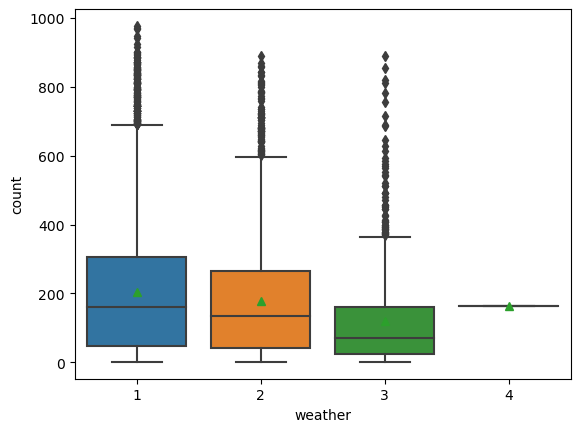

In [65]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.plot()

In [66]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for weather 1, 2 and 3. 
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
Normality check using **QQ Plot**. 

Homogeneity of Variances using **Levene's test**

Each observations are **independent**.

***STEP-3***: Define **Test statistics**

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

**F=MSB / MSW**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed f-test**

***STEP-5***: Compute the **p-value** and fix value of alpha.

---
we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our **alpha to be 0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0. 
* **p-val > alpha** : Accept H0 
* **p-val < alpha** : Reject H0

***Visual Tests to know if the samples follow normal distribution***

[]

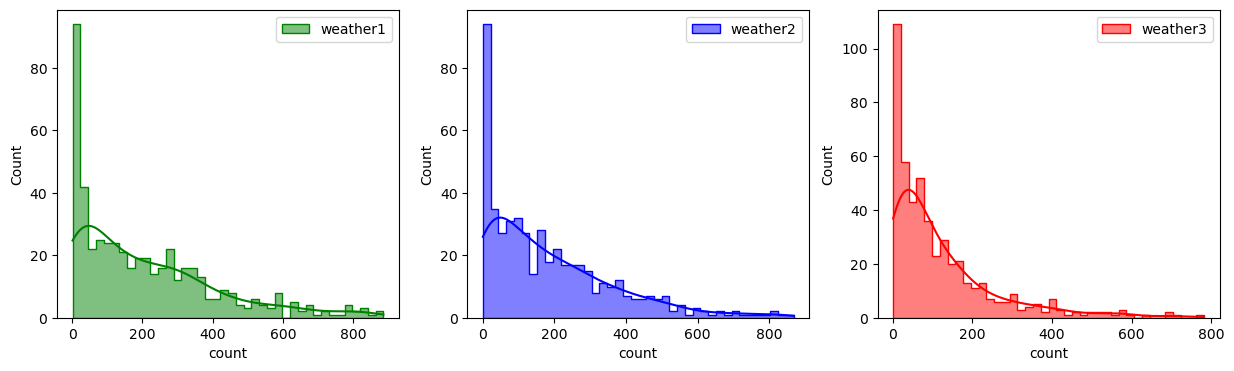

In [68]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40, 
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'red', kde = True, label = 'weather3')
plt.legend()
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Distribution check using QQ Plot***

[]

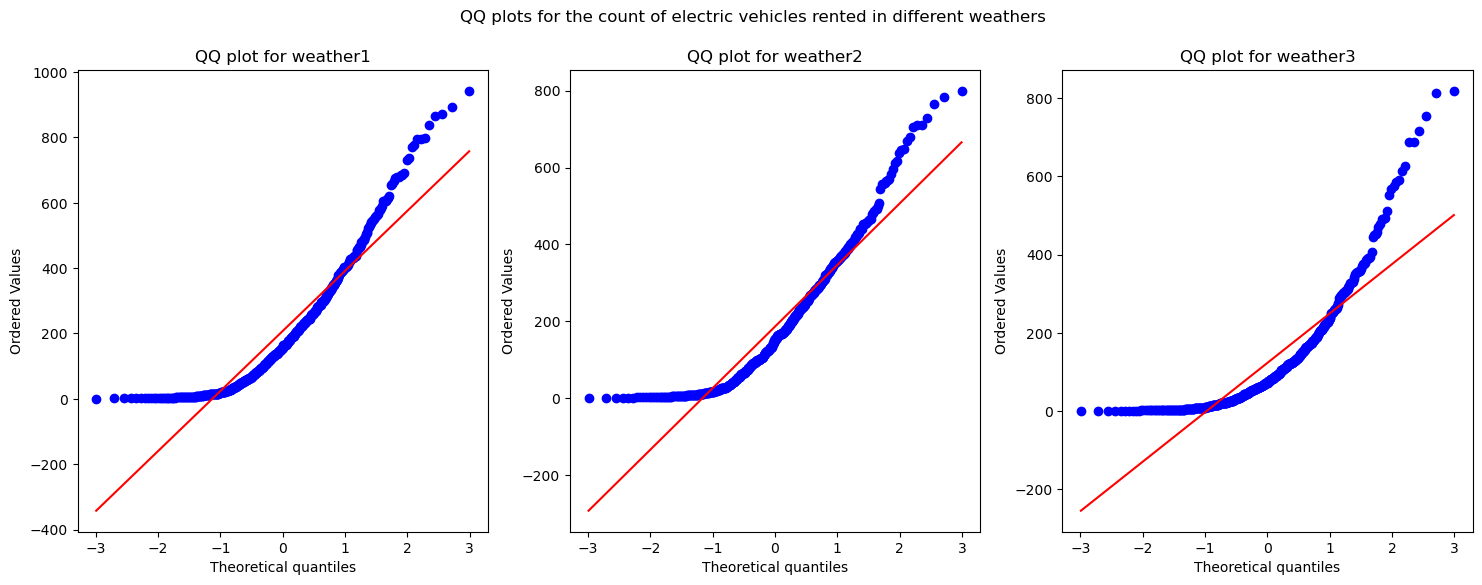

In [69]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

***Homogeneity of Variances using Levene's test***

In [71]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 4.18463799689864e-12
The samples do not have  Homogenous Variance


##### Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [76]:
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1['count'], df_weather2['count'], df_weather3['count'])  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 204.95566833068537
p value = 3.122066178659941e-45


##### Therefore, the average number of rental bikes is statistically different for different weathers.

### Is the number of cycles rented is similar or different in different season ?

In [77]:
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [79]:
df_season_spring = df.loc[df['season'] == 1, 'count']
df_season_summer = df.loc[df['season'] == 2, 'count']
df_season_fall = df.loc[df['season'] == 3, 'count']
df_season_winter = df.loc[df['season'] == 4, 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

[]

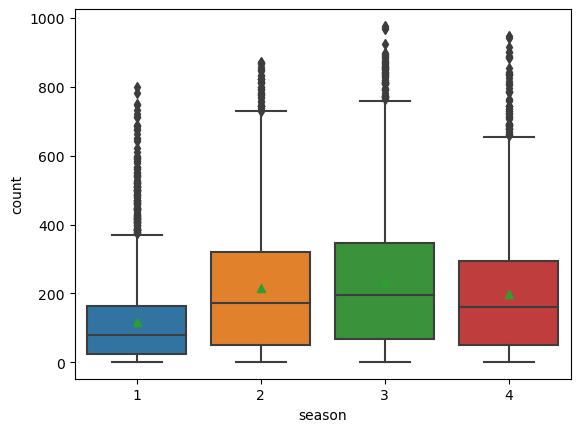

In [80]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.plot()

***STEP-1*** : Set up Null Hypothesis

---
* **Null Hypothesis ( H0 )** - Mean of cycle rented per hour is same for season 1,2,3 and 4.

* **Alternate Hypothesis ( HA )** -Mean of cycle rented per hour is different for season 1,2,3 and 4.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
1. **Normality check** using QQ Plot. If the distribution is not normal, use **BOX-COX transform** to transform it to normal distribution.

2. Homogeneity of Variances using **Levene's test**
3. Each observations are **independent**.

***STEP-3***: Define Test statistics

---
The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different. 

**F=MSB/MSW**

Under H0, the test statistic should follow **F-Distribution**.

***STEP-4***: Decide the kind of test.

---
We will be performing **right tailed f-test**

***STEP-5***: Compute the p-value and fix value of alpha.

---

we will be computing the anova-test p-value using the **f_oneway** function using scipy.stats.
We set our alpha to be **0.05**

***STEP-6***: Compare p-value and alpha.

---
Based on p-value, we will accept or reject H0.
p-val > alpha : Accept H0
p-val < alpha : Reject H0

[]

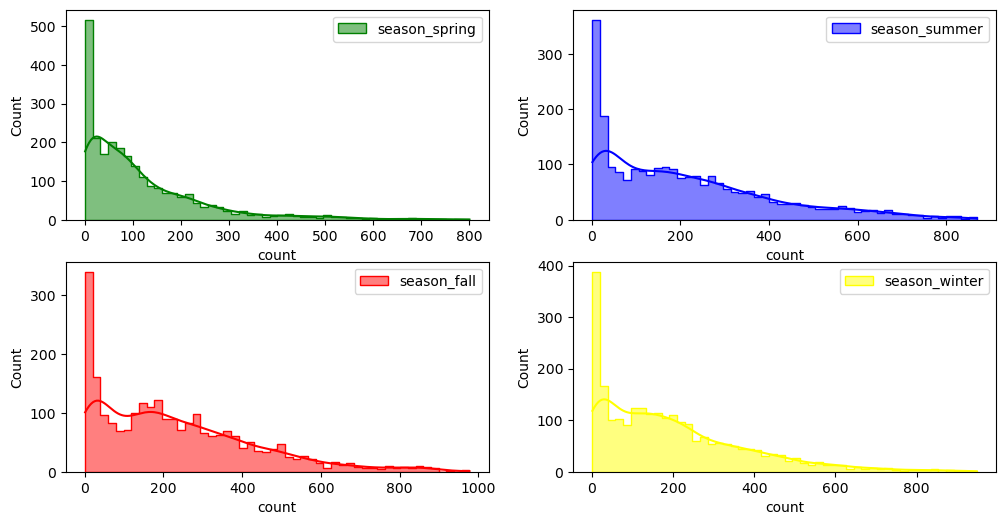

In [81]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50, 
             element = 'step', color = 'green', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'yellow', kde = True, label = 'season_winter')
plt.legend()
plt.plot()

 - It can be inferred from the above plot that the distributions do not follow normal distribution.

In [82]:
# Null Hypothesis(H0) - Homogenous Variance 

# Alternate Hypothesis(HA) - Non Homogenous Variance 

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.640141547262728e-106
The samples do not have  Homogenous Variance


##### Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [84]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)  
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


##### Therefore, the average number of rental bikes is statistically different for different seasons.

### Insights

- There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.
  - The average hourly count of rental bikes is the lowest in the month of January followed by February and March.
 - There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.
 - More than 80 % of the time, the temperature is less than 28 degrees celcius.
 - More than 80 % of the time, the humidity value is greater than 40. Thus for most of the time, humidity level varies from optimum to too moist.
 - More than 85 % of the total, windspeed data has a value of less than 20.
 - The hourly count of total rental bikes is the highest in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.
 - The mean hourly count of the total rental bikes is statistically similar for both working and non- working days.
 - There is statistically significant dependency of weather and season based on the hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different weathers.
 - There is no statistically significant dependency of weather 1, 2, 3 on season based on the average hourly total number of bikes rented.
 - The hourly total number of rental bikes is statistically different for different seasons.